<a href="https://colab.research.google.com/github/cmd-gunma-univ/DX-highschool/blob/main/Jupyter%E3%81%A7%E3%81%AEYOLOv8%E4%BD%BF%E7%94%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# USBカメラでリアルタイム撮影
import cv2
from IPython.display import display, Image, clear_output
import time

# 0 はカメラID。複数接続時は 1, 2 に変更して試してください
cap = cv2.VideoCapture(0)

# 必要なら解像度指定（任意）
# cap.set(cv2.CAP_PROP_FRAME_WIDTH, 1280)
# cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 720)

try:
    if not cap.isOpened():
        raise RuntimeError("カメラが開けませんでした。/dev/video0 を確認してください。")

    while True:
        ret, frame = cap.read()
        if not ret:
            print("フレームを取得できませんでした。")
            break

        # Jupyterで表示（cv2.imshowは使わない）
        ok, jpg = cv2.imencode('.jpg', frame)
        if not ok:
            continue
        clear_output(wait=True)
        display(Image(data=jpg.tobytes()))
        time.sleep(0.03)  # 約30fps相当の待ち（調整可）

except KeyboardInterrupt:
    print("⏹ 手動で停止しました。")

finally:
    cap.release()
    print("📸 カメラを解放しました。")

⏹ 手動で停止しました。
📸 カメラを解放しました。


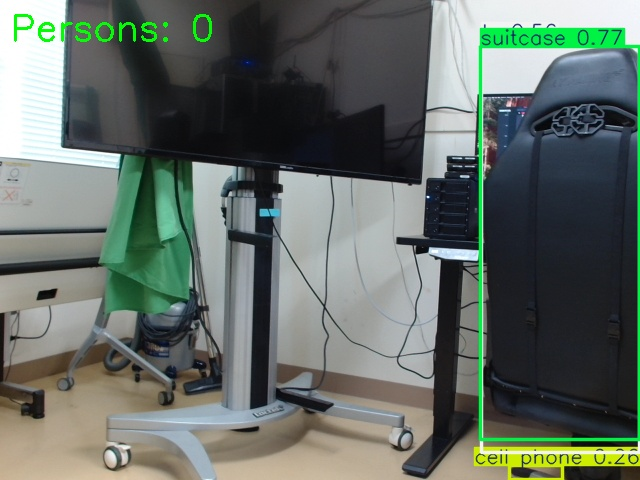

⏹ 手動で停止しました。
📸 カメラを解放しました。


In [ ]:
# 物体検出

from ultralytics import YOLO
import cv2
from IPython.display import display, Image, clear_output
import time

# --- YOLOモデルの読み込み ---
model = YOLO("yolov8n.pt")  # 軽量モデル。初回実行時に自動ダウンロードされます

# --- USBカメラを起動 ---
cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise RuntimeError("カメラが開けませんでした。/dev/video0 を確認してください。")

# 解像度設定（調整可能）
cap.set(cv2.CAP_PROP_FRAME_WIDTH, 640)
cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 480)

try:
    while True:
        ret, frame = cap.read()
        if not ret:
            print("フレームを取得できませんでした。")
            break

        # --- YOLOv8で推論 ---
        results = model.predict(source=frame, imgsz=640, conf=0.25, verbose=False)[0]

        # --- 「person」クラスをカウント（class_id == 0）---
        person_count = sum(1 for box in results.boxes if int(box.cls[0]) == 0)

        # --- 結果の描画 ---
        annotated = results.plot()
        cv2.putText(annotated, f"Persons: {person_count}", (10, 40),
                    cv2.FONT_HERSHEY_SIMPLEX, 1.2, (0, 255, 0), 2)

        # --- Jupyter上で表示 ---
        ok, jpg = cv2.imencode(".jpg", annotated)
        if not ok:
            continue
        clear_output(wait=True)
        display(Image(data=jpg.tobytes()))

        time.sleep(0.05)  # 表示間隔（fps調整）

except KeyboardInterrupt:
    print("⏹ 手動で停止しました。")

finally:
    cap.release()
    print("📸 カメラを解放しました。")

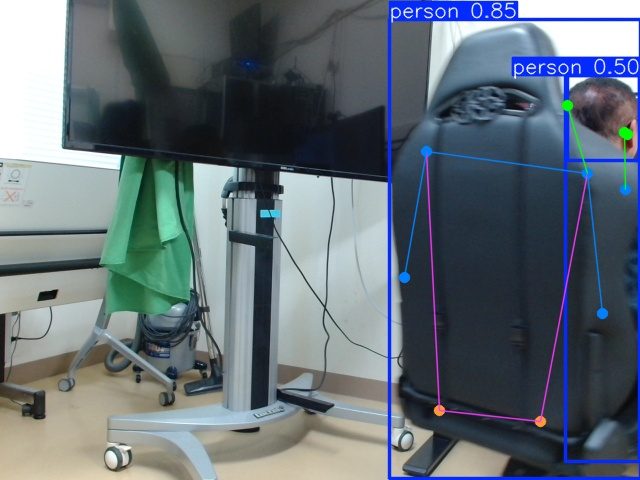

⏹ 手動で停止しました。
📸 カメラを解放しました。


In [ ]:
# ポーズ検出

from ultralytics import YOLO
import cv2, time
from IPython.display import display, Image, clear_output

# --- モデル読み込み（最軽量モデル） ---
model = YOLO("yolov8n-pose.pt")  # 他: yolov8s-pose.pt など

# --- カメラ起動 ---
cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise RuntimeError("カメラが開けませんでした。/dev/video0 を確認してください。")

# 解像度（軽くしたい場合は 640x480 などに下げる）
cap.set(cv2.CAP_PROP_FRAME_WIDTH,  640)
cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 480)

try:
    while True:
        ret, frame = cap.read()
        if not ret:
            print("フレームを取得できませんでした。")
            break

        # --- 推論（confやimgszで軽量化調整可） ---
        # results = model(frame, imgsz=640, conf=0.25, stream=False)[0]
        results = model.predict(source=frame, imgsz=640, conf=0.25, verbose=False)[0]

        # --- 骨格を描画したフレーム ---
        annotated = results.plot()

        # --- Jupyterで表示 ---
        ok, jpg = cv2.imencode(".jpg", annotated)
        if not ok:
            continue
        clear_output(wait=True)
        display(Image(data=jpg.tobytes()))

        # 表示間隔（重い環境では 0.1～0.2 に）
        time.sleep(0.03)

except KeyboardInterrupt:
    print("⏹ 手動で停止しました。")

finally:
    cap.release()
    print("📸 カメラを解放しました。")

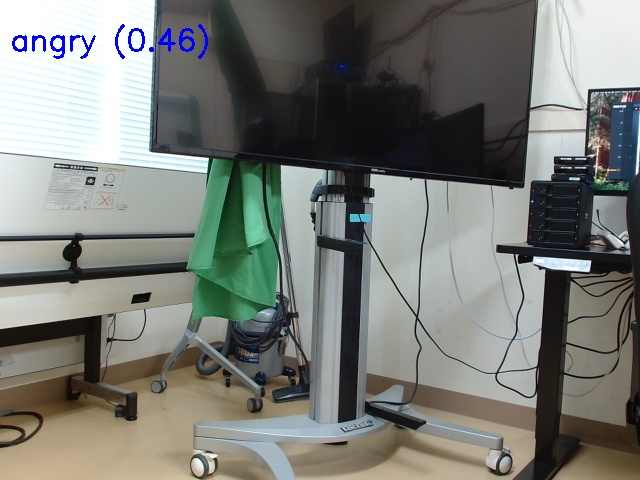

⏹ 手動で停止しました。
📸 カメラを解放しました。


In [ ]:
# 表情検出
import cv2
from fer import FER
from IPython.display import display, Image, clear_output
import time

# --- カメラを開く ---
cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise RuntimeError("カメラが開けませんでした。/dev/video0 を確認してください。")

# --- 表情認識モデル ---
detector = FER()

try:
    while True:
        ret, frame = cap.read()
        if not ret:
            print("フレームを取得できませんでした。")
            break

        # --- 表情推定 ---
        result = detector.top_emotion(frame)
        if result:
            emotion, score = result
            if emotion is not None and score is not None:
                label = f"{emotion} ({score:.2f})"
            else:
                label = "No face detected"
        else:
            label = "No face detected"

        # --- 結果を描画 ---
        cv2.putText(frame, label, (10, 50),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)

        # --- Jupyterでリアルタイム表示 ---
        ok, jpg = cv2.imencode('.jpg', frame)
        if not ok:
            continue
        clear_output(wait=True)
        display(Image(data=jpg.tobytes()))

        time.sleep(0.1)  # 表示間隔（0.03〜0.2で調整）

except KeyboardInterrupt:
    print("⏹ 手動で停止しました。")

finally:
    cap.release()
    print("📸 カメラを解放しました。")